In [309]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [350]:
df=pd.read_excel('dataset.xlsx')
# data source: https://fred.stlouisfed.org/

In [311]:
df.head()

,Year,Home Prices Index,House Starting,Employment-Popu. Ratio,Unemployment rate,Permit,Homeownership Rate,Population,Med. Household Income,Personal Savings,Real Estate Loans,Real Estate Loans.1,Personal Income per capita,Owners Equity in Real Estate,Real Estate loans,Total Housing Units,Fixed Mortgage rate,Fixed Mortgage rate.1,houses for sale/houses sold
0,2000,104.767917,1573.333333,64.408333,3.966667,1598.333333,67.375,33567.166667,41990.0,356.058333,1576.631325,11.700000,30640,7589.28200,NaN,104705,8.053462,7.718269,4.233333
1,2001,113.178500,1601.166667,63.666667,4.741667,1637.166667,67.825,34148.666667,42228.0,389.366667,1698.124408,7.166667,31574,8995.51575,NaN,108209,6.967885,6.502308,4.050000
2,2002,122.278250,1710.250000,62.733333,5.783333,1749.000000,67.925,34847.916667,42409.0,471.691667,1852.234175,13.808333,31807,9829.83125,NaN,109297,6.537308,5.982692,4.075000
3,2003,133.730833,1853.750000,62.266667,5.991667,1888.416667,68.250,35444.666667,43318.0,468.883333,2152.683433,9.616667,32645,10539.13650,NaN,111278,5.826981,5.170943,3.908333
4,2004,150.439250,1949.500000,62.350000,5.541667,2057.583333,69.000,36300.416667,44334.0,460.575000,2399.572317,13.483333,34219,11960.45550,14.5,112000,5.839231,5.206154,4.000000


In [312]:
# shape of the dataframe
df.shape

(21, 19)

In [313]:
# null values in different features
df.isnull().sum()

Year                            0
Home Prices Index               0
House Starting                  0
Employment-Popu. Ratio          0
Unemployment rate               0
Permit                          0
Homeownership Rate              0
Population                      0
Med. Household Income           1
Personal Savings                0
Real Estate Loans               0
Real Estate Loans.1             0
Personal Income per capita      0
Owners Equity in Real Estate    0
Real Estate loans               4
Total Housing Units             0
Fixed Mortgage rate             0
Fixed Mortgage rate.1           0
houses for sale/houses sold     0
dtype: int64

In [314]:
#impute nan values
for i in df.columns:
    if(df[i].isnull().sum()>=1):
        df[i].fillna(df[i].median(),inplace=True)

In [315]:
# all nan values are imputed by median of the feature
df.isnull().sum()

Year                            0
Home Prices Index               0
House Starting                  0
Employment-Popu. Ratio          0
Unemployment rate               0
Permit                          0
Homeownership Rate              0
Population                      0
Med. Household Income           0
Personal Savings                0
Real Estate Loans               0
Real Estate Loans.1             0
Personal Income per capita      0
Owners Equity in Real Estate    0
Real Estate loans               0
Total Housing Units             0
Fixed Mortgage rate             0
Fixed Mortgage rate.1           0
houses for sale/houses sold     0
dtype: int64

In [316]:
# converting the integers to datetime format 
df['Year'] = pd.to_datetime(df['Year'], format='%Y') 

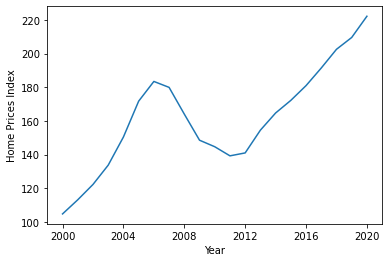

In [317]:
# dependent feature home price index vs year
sns.lineplot(df['Year'],df['Home Prices Index'])

### because pairplot won't be able to explain the relation of a 19d dataset because of it's limitation, we'll find best feature by the help of correlation test 

In [318]:
## making a copy of to standardize without loosing the original data-frame

In [319]:
data=df
data.drop(columns=['Year'],axis=1,inplace=True)

In [320]:
# Data-preprocessing: Standardizing the data
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler
new_df = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

In [321]:
df_impor=new_df

In [322]:
new_df.head()

,Home Prices Index,House Starting,Employment-Popu. Ratio,Unemployment rate,Permit,Homeownership Rate,Population,Med. Household Income,Personal Savings,Real Estate Loans,Real Estate Loans.1,Personal Income per capita,Owners Equity in Real Estate,Real Estate loans,Total Housing Units,Fixed Mortgage rate,Fixed Mortgage rate.1,houses for sale/houses sold
0,-1.871908,0.676217,1.747560,-1.122463,0.607175,0.494486,-1.524623,-1.307395,-0.850280,-1.953333,1.199729,-1.431326,-1.342830,0.088495,-1.989526,2.282042,2.266356,-0.851264
1,-1.595241,0.738641,1.392501,-0.691950,0.691885,0.740752,-1.367262,-1.273649,-0.789832,-1.817915,0.445425,-1.320260,-0.946133,0.088495,-1.484479,1.445518,1.407905,-0.952730
2,-1.295905,0.983291,0.945685,-0.113304,0.935835,0.795477,-1.178037,-1.247985,-0.640429,-1.646143,1.550536,-1.292554,-0.710774,0.088495,-1.327661,1.113724,1.041063,-0.938894
3,-0.919171,1.305130,0.722277,0.002425,1.239955,0.973336,-1.016549,-1.119099,-0.645526,-1.311259,0.853082,-1.192904,-0.510680,0.088495,-1.042132,0.566361,0.467980,-1.031136
4,-0.369547,1.519877,0.762171,-0.247550,1.608970,1.383779,-0.784974,-0.975041,-0.660604,-1.036074,1.496459,-1.005733,-0.109728,1.471980,-0.938067,0.575800,0.492838,-0.980403


### Correlation test

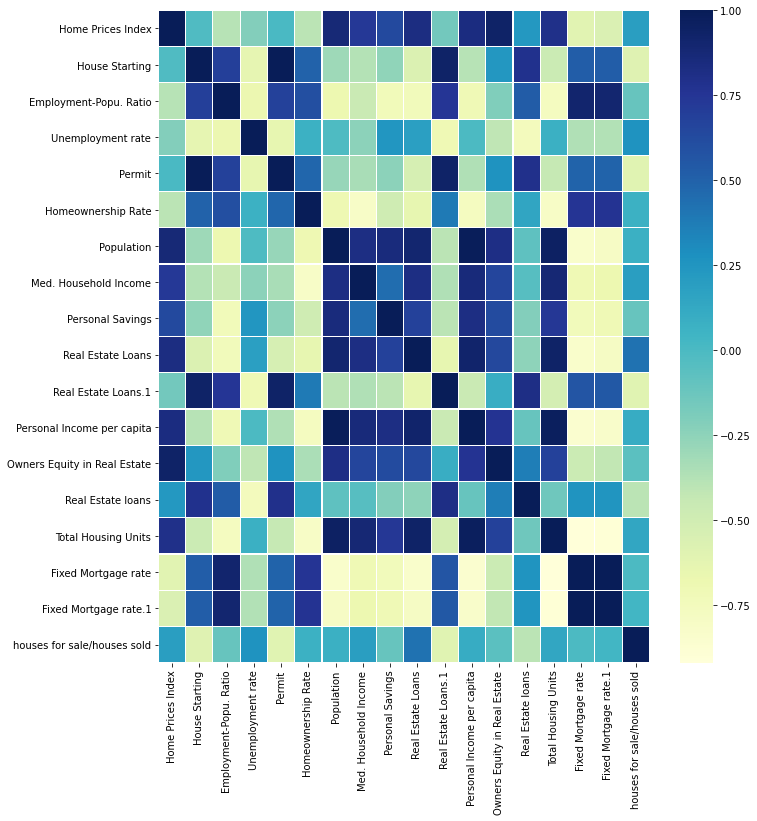

In [323]:
corrmat = new_df.corr() 
  
f, ax = plt.subplots(figsize =(11, 12)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

#### Listed features were highly correlated with dependent feature than any other:
- Population
- Med. Household Income
- Personal Savings
- Real Estate Loans 
- Personal Income per capita 
- Owners Equity in Real Estate
- total housing units
- fixed mortgage rate

In [324]:
new_df=new_df[['Population',
       'Med. Household Income', 'Personal Savings', 'Real Estate Loans', 'Personal Income per capita',
       'Owners Equity in Real Estate', 'Total Housing Units', 'Fixed Mortgage rate']]

In [325]:
new_df.head(2)

,Population,Med. Household Income,Personal Savings,Real Estate Loans,Personal Income per capita,Owners Equity in Real Estate,Total Housing Units,Fixed Mortgage rate
0,-1.524623,-1.307395,-0.850280,-1.953333,-1.431326,-1.342830,-1.989526,2.282042
1,-1.367262,-1.273649,-0.789832,-1.817915,-1.320260,-0.946133,-1.484479,1.445518


In [326]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df,df['Home Prices Index'],test_size=0.20,random_state=100)

In [327]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [328]:
x_train.shape

(16, 8)

In [329]:
lreg.fit(x_train,y_train)

LinearRegression()

In [330]:
pred = lreg.predict(x_test)

In [331]:
pred

array([203.84592968, 262.92718864, 142.96352148, 196.29882042,
       145.33975829])

In [332]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.6353378856563204

In [333]:
# the accuracy could be less because we have very less values to validate the model

### Ridge regressor

In [334]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [335]:
pred1=ridge.predict(x_test)

In [336]:
r2_score(y_test,pred1)

0.7005623672952057

### Lasso Regressor

In [337]:
from sklearn.linear_model import Lasso
ridge = Lasso(alpha=0.01)
ridge.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.425076266565636, tolerance: 1.0335326364666664
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [338]:
pred2=ridge.predict(x_test)

In [339]:
r2_score(y_test,pred2)

0.5368130977518738

Feature Importance can get the feature importance of each feature of your dataset by using the feature importance property of the model.

In [346]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(new_df,df['Home Prices Index'])

ExtraTreesRegressor()

In [347]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.1649314  0.03704975 0.02436371 0.15074782 0.10107611 0.41895121
 0.07279888 0.03008113]


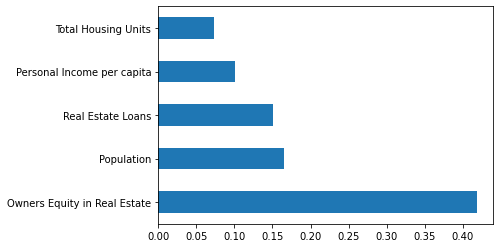

In [348]:
feat_importances = pd.Series(model.feature_importances_, index=new_df.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

## Conclusion

* A price of house is largely dependent on:
- Owners Equity in Real Estate (how much person is investing)
- Population
- Real Estate Loans (Total amt. of loan that is being offered)
- Personal Income of a person
- No. of households Available
    


### Follow-ups

- More features could be added up
- ML model accuracy could be improvised by using cross validation
- Different models could be used to train the data